In [1]:
!ls


74492514-2c47-48fb-a822-80e05464021b.jpg
Image_Data_Generator.ipynb
Simple_MNIST_CNN.ipynb
Transfer_Learning_Cats_Dogs_Humans_Horses_CNN.ipynb
readme.md
sample_image.jpg


In [ ]:
# /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
# brew install wget

In [12]:
!wget "https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0"

--2024-03-02 06:05:51--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.11.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.11.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2024-03-02 06:05:51--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc006e3985f83feadd8cda38ea26.dl.dropboxusercontent.com/zip_download_get/BxvkUii3bJfeJPTxjsOuJwf6MPS_tPkMA8uuZkkhExFDIU8fU3K2khxRp5vxNqHNmoUgAsugTqe0G8LcHcZMufIxq9pGD496D5EPvyuQJ_BvxA# [following]
--2024-03-02 06:05:52--  https://uc006e3985f83feadd8cda38ea26.dl.dropboxusercontent.com/zip_download_get/BxvkUii3bJfeJPTxjsOuJwf6MPS_tPkMA8uuZkkhExFDIU8fU3K2khxRp5vxNqHNmoUgAsugTqe0G8LcHcZMufIxq9pGD496D5EPvyuQJ_BvxA
Resolvi

In [13]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/cats/cat.10.jpg  
 extracting: Images/cats/cat.11.jpg  
 extracting: Images/cats/cat.12.jpg  


In [14]:
!ls 

74492514-2c47-48fb-a822-80e05464021b.jpg
AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Image_Data_Generator.ipynb
Images
Simple_MNIST_CNN.ipynb
Transfer_Learning_Cats_Dogs_Humans_Horses_CNN.ipynb
readme.md
sample_image.jpg


In [16]:
import os, shutil
folders = os.listdir("images")

In [22]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]
!ls

74492514-2c47-48fb-a822-80e05464021b.jpg
AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Image_Data_Generator.ipynb
Images
Simple_MNIST_CNN.ipynb
Transfer_Learning_Cats_Dogs_Humans_Horses_CNN.ipynb
readme.md
sample_image.jpg
val_images


In [23]:
for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.9
for f in os.listdir("images"):
    path = "images/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)

In [26]:
!ls Images

cats   dogs   horses humans


In [27]:
!ls val_images/

cats   dogs   horses humans


In [24]:
print("Training Data")
for f in folders:
    path = "images/"+f
    print(f+ " "+str(len(os.listdir(path))))
   

print("\n Validation Data") 
for f in folders:
    path = "val_images/"+f
    print(f+ " "+str(len(os.listdir(path))))
    

Training Data
dogs 130
cats 130
humans 130
horses 130

 Validation Data
dogs 15
cats 15
humans 15
horses 15


In [28]:
os.listdir("vAl_imagEs")

['dogs', 'cats', 'humans', 'horses']

2024-03-02 06:38:40.267187: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


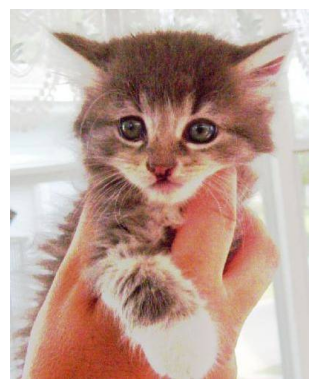

In [29]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

sample_path = "images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

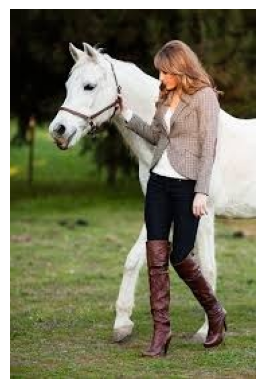

In [32]:
sample_path = "val_images/humans/rider-163.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

IMPORTANT NOTE:
Actually, Below train_generator will generate data batch by batch infinitely.

When we call model.fit_generator(), we specify the train_generator as generator, and set steps_per_epoch (should be len(train_data)/batch_size). Then the model would know when a single epoch is finished.



In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 520 images belonging to 4 classes.


Found 60 images belonging to 4 classes.


In [47]:
val_gen.flow_from_directory?
#   shuffle: Whether to shuffle the data If `False`, sorts the
#     data in alphanumeric order. Defaults to `True`.

Signature:
val_gen.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)
Docstring:
Takes the path to a directory & generates batches of augmented data.

Args:
  directory: string, path to the target directory. It should contain
    one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
    inside each of the subdirectories directory tree will be included
    in the generator. See [this script](
    https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
    for more details.
  target_size: Tuple of integers `(height, width)`. The dimensions to
    which all images found will be resized. Defaults to `(256,256)`.
  color_mode: One of "grayscale", "rgb", "rgba". Default: "rg

In [58]:
train_generator.classes
train_generator.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'humans': 3}

(32, 224, 224, 3)
(32, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


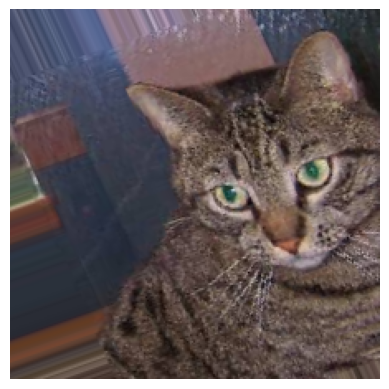

In [67]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    print(y)
    plt.imshow(x[0])
    plt.axis("off")
    plt.show()
    break
# for x,y in train_generator:
#     print(x.shape)
#     print(y.shape)
#     print(y)
#     plt.imshow(x[0])
#     plt.axis("off")
#     plt.show()
#     break

# in each epoch, different augmentation is applied

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()





/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,output=fc2)

model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [ ]:
for ix in range(len(model_new.layers)):
    pass
    #print(ix,model_new.layers[ix])

for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Train our model
from keras.optimizers import Adam
adam = Adam(lr=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:

history = model_new.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 5,
    validation_data = val_generator,
    validation_steps = 4   
)

Epoch 1/5
5/5 [==============================] - 3s 688ms/step - loss: 0.0924 - acc: 0.9562 - val_loss: 2.7280 - val_acc: 0.3047
Epoch 2/5
5/5 [==============================] - 3s 558ms/step - loss: 0.0681 - acc: 0.9586 - val_loss: 3.2347 - val_acc: 0.2422


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']


In [ ]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()